In [1]:
import numpy as np
import pandas as pd
import csv
import statistics
import matplotlib.pyplot as plt

**READ IN CSVs PRODUCED BY two_photon & edgescore scripts**

In [2]:
# root = '../data/exp_627823571_VISp/'
max_dff_ordered=pd.read_csv('max_dff_subset_ordered.csv') # natural
mean_dff_ordered=pd.read_csv('mean_dff_subset_ordered.csv') # natural 
ns_stim_exp=pd.read_csv('ns_stim_frame_presentation.csv') # natural 
pref_ori_ordered=pd.read_csv('pref_ori_ordered_subset.csv') # static 
# list_of_osi_cells = pd.read_csv('cell_specimen_id_filtered.csv') # static 
edge_scores=pd.read_csv('edge_scores_normalized_by_sum.csv')
two_linear_ori=pd.read_csv('two_std_linear.csv')

**FIND AVERAGE DFF FOR EACH IMAGE FOR EACH CELL (AVERAGING ACROSS THE 50 REPLICATES OF EACH STIM PRESENTATION)**

In [3]:
# adjust frame numbers by making every instance of 1 -> 117 
list_ns_stim_exp=list(ns_stim_exp.frame)
list_ns_stim_exp_adjusted = [117.0 if value == -1 else value for value in list_ns_stim_exp]


In [4]:
# transpose dff dataframes to prepare to associate with each natural scene frame
max_dff_ordered_t=max_dff_ordered.T
mean_dff_ordered_t=mean_dff_ordered.T

In [5]:
print(max_dff_ordered['cell_specimen_id'])

0      662199605
1      662199626
2      662199683
3      662199697
4      662199710
         ...    
117    662203014
118    662203030
119    662203048
120    662203077
121    662203089
Name: cell_specimen_id, Length: 122, dtype: int64


In [6]:
list_of_osi_cells=two_linear_ori

In [7]:
pref_ori_ordered


,cell_specimen_id,pref_ori
0,662199605,90
1,662199626,90
2,662199683,120
3,662199697,0
4,662199710,0
...,...,...
117,662203014,90
118,662203030,60
119,662203048,60
120,662203077,90


In [8]:
pref_ori_lists = {90: [], 120: [], 0: [], 30: [], 60: [], 150: []}
df_pref_ori_ordered = pd.DataFrame(pref_ori_ordered)


for index, row in df_pref_ori_ordered.iterrows():
    cell_specimen_id = row['cell_specimen_id']
    pref_ori = row['pref_ori']
    pref_ori_lists[pref_ori].append(cell_specimen_id)

print(pref_ori_lists)


{90: [662199605, 662199626, 662199727, 662199848, 662199907, 662200053, 662200071, 662200097, 662200146, 662200241, 662200268, 662200347, 662200392, 662200494, 662200841, 662201033, 662201114, 662201262, 662201359, 662201468, 662201555, 662201643, 662201690, 662202375, 662202564, 662202597, 662202673, 662202690, 662202948, 662203014, 662203077], 120: [662199683, 662199835, 662200445, 662200486, 662200560, 662200636, 662200729, 662201175, 662201674, 662201773, 662201791, 662201965, 662201975, 662202121, 662202542, 662203089], 0: [662199697, 662199710, 662200128, 662200162, 662200527, 662200746, 662200759, 662201098, 662201246, 662201299, 662201459, 662201492, 662201594, 662201744, 662201807, 662201917, 662202157, 662202510, 662202612, 662202627, 662202641, 662202654, 662202747, 662202935], 30: [662200029, 662200180, 662200220, 662200515, 662200969, 662201050, 662201087, 662201126, 662201233, 662201254, 662201325, 662201381, 662201406, 662201516, 662201874, 662202175, 662202199, 66220222

In [9]:
mean_dff_ordered_filtered = mean_dff_ordered[mean_dff_ordered['cell_specimen_id'].isin(list_of_osi_cells['cell_specimen_id'])]
max_dff_ordered_filtered = max_dff_ordered[max_dff_ordered['cell_specimen_id'].isin(list_of_osi_cells['cell_specimen_id'])]

In [10]:
# # replace numbers 0-5949 in ns_stim_frame_presentation with ns_stim_list 
# # IMPT: only run this once! to not change list_ns_stim_exp_adjusted again
# list_ns_stim_exp_adjusted = ['cell_specimen_id'] + list_ns_stim_exp_adjusted
# mean_dff_ordered_filtered.columns = list_ns_stim_exp_adjusted
# max_dff_ordered_filtered.columns = list_ns_stim_exp_adjusted


In [11]:
# creating a dictionary that separates mean_dff_ordered_filtered and max_dff_ordered_filtered by preferred orientation
mean_dff_ordered_filtered_with_pref_ori = pd.merge(mean_dff_ordered_filtered, pref_ori_ordered, on='cell_specimen_id')
max_dff_ordered_filtered_with_pref_ori = pd.merge(max_dff_ordered_filtered, pref_ori_ordered, on='cell_specimen_id')

mean_df_dict = {}
max_df_dict = {}
for pref_ori_value in [0, 30, 60, 90, 120, 150]:
    mean_df_dict[pref_ori_value] = mean_dff_ordered_filtered_with_pref_ori[mean_dff_ordered_filtered_with_pref_ori['pref_ori'] == pref_ori_value].drop(columns=['pref_ori'])
    max_df_dict[pref_ori_value] = max_dff_ordered_filtered_with_pref_ori[max_dff_ordered_filtered_with_pref_ori['pref_ori'] == pref_ori_value].drop(columns=['pref_ori'])

In [19]:
mean_dff_ordered_filtered_with_pref_ori

,cell_specimen_id,81.0,18.0,31.0,58.0,13.0,95.0,77.0,96.0,74.0,...,34.0,34.0,116.0,115.0,52.0,112.0,77.0,102.0,115.0,pref_ori
0,662199907,0.005537,-0.017866,-0.017210,-0.024051,0.061930,-0.007859,-0.093596,-0.017499,0.057964,...,0.031862,-0.002323,-0.031517,-0.003660,-0.011111,0.038531,0.012688,0.000662,0.015275,90
1,662200392,-0.018679,-0.020793,0.043997,-0.014496,0.040704,0.021323,0.028175,-0.060804,-0.056953,...,-0.014094,-0.049630,-0.014422,-0.023574,-0.017820,-0.027096,0.004947,0.031893,0.035968,90
2,662201359,-0.038175,0.015760,0.004585,-0.003967,-0.002065,0.026306,0.008828,-0.072874,-0.041741,...,0.039327,-0.007583,0.025778,-0.036825,-0.009391,-0.022151,-0.007467,-0.032139,0.056725,90
3,662202175,0.000981,0.007030,-0.002323,-0.005122,0.037083,0.017927,0.006500,0.003276,0.020978,...,0.009065,0.002473,0.042016,-0.001465,-0.017594,0.015461,-0.004412,-0.031724,0.006189,30
4,662202199,-0.051316,-0.041408,-0.030425,0.266693,0.109859,0.046994,0.041032,-0.022510,-0.071462,...,0.044363,-0.013573,-0.041005,-0.034182,-0.021854,0.021328,0.014227,0.006759,-0.025202,30
5,662202918,0.005380,0.031133,0.016701,-0.024896,-0.029480,0.064623,-0.020701,-0.021243,-0.011697,...,0.015056,0.011297,-0.008858,-0.018077,0.014919,0.020802,-0.043566,0.035462,-0.014292,150


In [20]:
# Since each image is repeated 50 times, for each cell I will average the 50 repetitions of each image. 
# This should reduce the number of columns from 5951 image repetitions to 118 images 
for pref_ori_value in [0, 30, 60, 90, 120, 150]:
    mean_df_dict[pref_ori_value] = mean_df_dict[pref_ori_value].groupby(axis=1, level=0).mean()
    max_df_dict[pref_ori_value] = max_df_dict[pref_ori_value].groupby(axis=1, level=0).mean()

In [22]:
# sanity check to check the size 
mean_df_dict[90]

,0,1,2
0.0,3.198231e-02,1.802003e-02,7.396938e-02
1.0,9.545102e-03,1.580503e-02,2.149478e-02
2.0,3.637654e-03,-1.892120e-03,-1.566088e-02
3.0,2.758457e-02,7.710270e-03,-2.283987e-02
4.0,4.369489e-03,-1.624784e-03,4.656784e-02
...,...,...,...
114.0,9.294326e-03,2.794184e-03,3.072080e-03
115.0,1.047100e-02,-7.044325e-03,5.205243e-02
116.0,2.361039e-02,1.210960e-02,9.683030e-02
117.0,1.062620e-02,5.967980e-03,6.605527e-02


In [23]:
# print out format of edge scores
edge_scores

,Unnamed: 0,0,30,60,90,120,150
0,0,0.140268,0.113346,0.117948,0.158095,0.234487,0.235856
1,1,0.111325,0.153892,0.183915,0.229867,0.176943,0.144058
2,2,0.178618,0.139028,0.134122,0.158725,0.197833,0.191674
3,3,0.114039,0.130004,0.161034,0.209393,0.203055,0.182475
4,4,0.099571,0.169813,0.222011,0.233712,0.134635,0.140258
...,...,...,...,...,...,...,...
113,113,0.613158,0.158085,0.066591,0.025282,0.046567,0.090316
114,114,0.025913,0.051173,0.124503,0.603462,0.126572,0.068376
115,115,0.179647,0.207055,0.145380,0.094193,0.165506,0.208220
116,116,0.154026,0.155797,0.151183,0.143921,0.195839,0.199233


In [58]:
for degree in [0, 30, 60, 90, 120, 150]:
    mean_df_dict[degree] = (mean_df_dict[degree]).T

mean_df_dict[30] 



,3,4
0.0,3.813270e-03,2.413003e-02
1.0,-1.685600e-03,1.369147e-01
2.0,1.338358e-02,5.374515e-02
3.0,7.643377e-03,2.522015e-02
4.0,-4.029674e-04,5.488748e-02
...,...,...
114.0,7.965355e-03,4.094530e-02
115.0,1.574106e-02,1.123629e-02
116.0,3.576593e-02,1.285070e-02
117.0,4.722913e-03,1.648756e-02


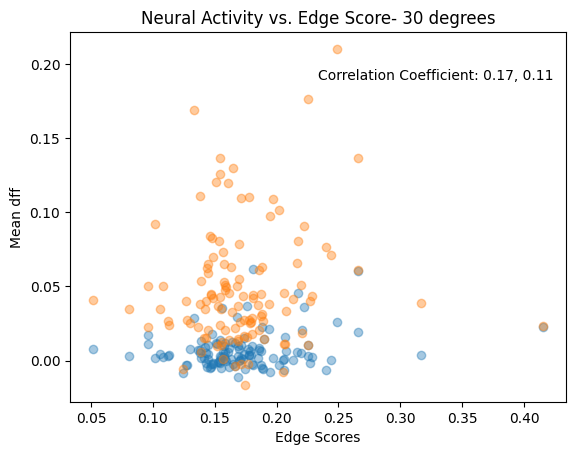

In [70]:
from scipy.stats import pearsonr
# just plotting for cells selective for 30 degree edges

# get one column of edge_scores
edge_score_30 = edge_scores['30']

for column in mean_df_dict[30].columns:
    plt.scatter(edge_score_30, mean_df_dict[30][column][:-1], alpha=0.4)
plt.xlabel('Edge Scores')  # Replace with your actual x-axis label
plt.ylabel('Mean dff') 
plt.title("Neural Activity vs. Edge Score- 30 degrees")

# # this is calculating the correlation coefficient of the sum of the two cells
# corr_array =  np.zeros(118)
# corr_array+=(np.array(mean_df_dict[30][3][:-1]))
# corr_array += mean_df_dict[30][4][:-1]

correlation_coefficient, _ = pearsonr(edge_score_30, mean_df_dict[30][3][:-1])
correlation_coefficient_2, _ = pearsonr(edge_score_30, mean_df_dict[30][4][:-1])

correlation_coefficient, _ = pearsonr(edge_score_30, corr_array)


# Display the correlation coefficient on the plot
plt.text(0.5, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}, {correlation_coefficient_2:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

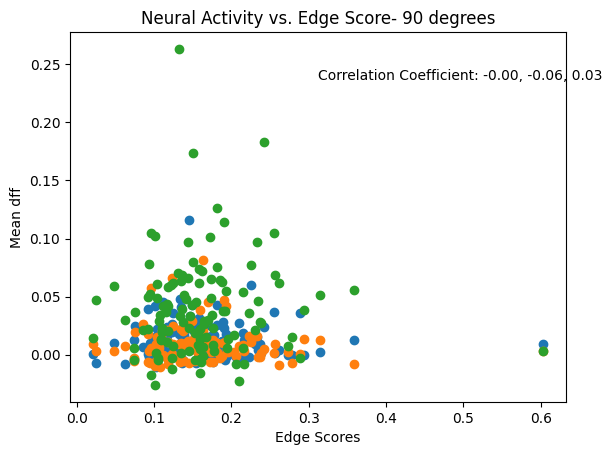

In [68]:

# get one column of edge_scores
edge_score_90 = edge_scores['90']

for column in mean_df_dict[90].columns:
    plt.scatter(edge_score_90, mean_df_dict[90][column][:-1])
plt.xlabel('Edge Scores')  # Replace with your actual x-axis label
plt.ylabel('Mean dff') 
plt.title("Neural Activity vs. Edge Score- 90 degrees")

correlation_coefficient, _ = pearsonr(edge_score_90, mean_df_dict[90][0][:-1])
correlation_coefficient_1, _ = pearsonr(edge_score_90, mean_df_dict[90][1][:-1])
correlation_coefficient_2, _ = pearsonr(edge_score_90, mean_df_dict[90][2][:-1])

# Display the correlation coefficient on the plot
plt.text(0.5, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}, {correlation_coefficient_1:.2f}, {correlation_coefficient_2:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

*Ashley's code*
**SUBSET pref_ori_ordered BY PREFERRED DEGREE**

In [ ]:
cell_pref_0=[]
cell_pref_30=[]
cell_pref_60=[]
cell_pref_90=[]
cell_pref_120=[]
cell_pref_150=[]

def subset_pref_ori (list_cell_pref, degree):
    for i in range(len(pref_ori_ordered)):
        if pref_ori_ordered.loc[i]['pref_ori'] == degree:
            list_cell_pref.append(pref_ori_ordered.loc[i]['cell_specimen_id'])

subset_pref_ori(cell_pref_0, 0)
subset_pref_ori(cell_pref_30, 30)
subset_pref_ori(cell_pref_60, 60)
subset_pref_ori(cell_pref_90, 90)
subset_pref_ori(cell_pref_120, 120)

In [ ]:
False in max_dff_ordered['cell_specimen_id']==pref_ori_ordered['cell_specimen_id']
# the cell IDs and indexes align, which is why I can do this:

**AVERAGE THE DFF ACROSS CELLS WITH A PREFERRED ORIENTATION FOR EACH IMAGE**

In [ ]:
def pref_ori_avg_dff(cell_pref, cell_pref_max, cell_pref_mean):
    for i in range(len(cell_pref)):
        cell_index=pref_ori_ordered.index[pref_ori_ordered['cell_specimen_id']==cell_pref[i]][0]
        cell_pref_max.append(avg_max_dff_stim_all[cell_index])
        cell_pref_mean.append(avg_mean_dff_stim_all[cell_index])

def avg_pref_ori(cell_pref_max, cell_pref_mean, mean_cells_max, mean_cells_mean):
    # transpose inputs
    cell_pref_max_t=list(map(list, zip(*cell_pref_max)))
    cell_pref_mean_t=list(map(list, zip(*cell_pref_mean)))
    for i in range(len(cell_pref_max_t)):
        avg_max_activity=statistics.mean(cell_pref_max_t[i])
        avg_mean_activity=statistics.mean(cell_pref_mean_t[i])
        mean_cells_max.append(avg_max_activity)
        mean_cells_mean.append(avg_mean_activity)

In [ ]:
# make empty lists
pref_0_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images. SCATTERPLOT
pref_0_avg_mean_dff=[] # same vibe here

mean_cells_0_avg_max=[] # mean activity across cells for each img. averaged: 
mean_cells_0_avg_mean=[] # same vibe here

pref_30_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_30_avg_mean_dff=[] # same vibe here

mean_cells_30_avg_max=[] # mean activity across cells for each img
mean_cells_30_avg_mean=[] # same vibe here

pref_60_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_60_avg_mean_dff=[] # same vibe here

mean_cells_60_avg_max=[] # mean activity across cells for each img
mean_cells_60_avg_mean=[] # same vibe here

pref_90_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_90_avg_mean_dff=[] # same vibe here

mean_cells_90_avg_max=[] # mean activity across cells for each img
mean_cells_90_avg_mean=[] # same vibe here

pref_120_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_120_avg_mean_dff=[] # same vibe here

mean_cells_120_avg_max=[] # mean activity across cells for each img
mean_cells_120_avg_mean=[] # same vibe here

pref_150_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_150_avg_mean_dff=[] # same vibe here

mean_cells_150_avg_max=[] # mean activity across cells for each img
mean_cells_150_avg_mean=[] # same vibe here

In [ ]:
# now do it

# 0
pref_ori_avg_dff(cell_pref_0, pref_0_avg_max_dff, pref_0_avg_mean_dff)
avg_pref_ori(pref_0_avg_max_dff, pref_0_avg_mean_dff, mean_cells_0_avg_max, mean_cells_0_avg_mean)

# 30
pref_ori_avg_dff(cell_pref_30, pref_30_avg_max_dff, pref_30_avg_mean_dff)
avg_pref_ori(pref_30_avg_max_dff, pref_30_avg_mean_dff, mean_cells_30_avg_max, mean_cells_30_avg_mean)

# 60
pref_ori_avg_dff(cell_pref_60, pref_60_avg_max_dff, pref_60_avg_mean_dff)
avg_pref_ori(pref_60_avg_max_dff, pref_60_avg_mean_dff, mean_cells_60_avg_max, mean_cells_60_avg_mean)

# 90
pref_ori_avg_dff(cell_pref_90, pref_90_avg_max_dff, pref_90_avg_mean_dff)
avg_pref_ori(pref_90_avg_max_dff, pref_90_avg_mean_dff, mean_cells_90_avg_max, mean_cells_90_avg_mean)

# 120
pref_ori_avg_dff(cell_pref_120, pref_120_avg_max_dff, pref_120_avg_mean_dff)
avg_pref_ori(pref_120_avg_max_dff, pref_120_avg_mean_dff, mean_cells_120_avg_max, mean_cells_120_avg_mean)

# 150
pref_ori_avg_dff(cell_pref_150, pref_150_avg_max_dff, pref_150_avg_mean_dff)
avg_pref_ori(pref_150_avg_max_dff, pref_150_avg_mean_dff, mean_cells_150_avg_max, mean_cells_150_avg_mean)

In [ ]:
# ok so now we have: mean neural activity for each image type subsetted by cell preferred orientation
# orientation in this case I centered around 0, 30, 60, 90, 120, 150, +/- 15 degrees
# next step, make a dataframe where we have these activity values for each preferred orientation and each edge score: should be easy

In [ ]:
activity_w_edge_scores=edge_scores.copy(True)

activity_w_edge_scores['max_dff_0']=mean_cells_0_avg_max
activity_w_edge_scores['mean_dff_0']=mean_cells_0_avg_mean

activity_w_edge_scores['max_dff_30']=mean_cells_30_avg_max
activity_w_edge_scores['mean_dff_30']=mean_cells_30_avg_mean

# activity_w_edge_scores['max_dff_60']=mean_cells_60_avg_max
# activity_w_edge_scores['mean_dff_60']=mean_cells_60_avg_mean

activity_w_edge_scores['max_dff_90']=mean_cells_90_avg_max
activity_w_edge_scores['mean_dff_90']=mean_cells_90_avg_mean

activity_w_edge_scores['max_dff_120']=mean_cells_120_avg_max
activity_w_edge_scores['mean_dff_120']=mean_cells_120_avg_mean

# activity_w_edge_scores['max_dff_150']=mean_cells_150_avg_max
# activity_w_edge_scores['mean_dff_150']=mean_cells_150_avg_mean



In [ ]:
activity_edge_30=list(zip(list(activity_w_edge_scores['30']), list(activity_w_edge_scores['max_dff_30'])))
activity_edge_30.sort(key=lambda x: x[0])

In [ ]:
edge_score_30, activity_30 =list(zip(*activity_edge_30))

plt.scatter(edge_score_30, activity_30, marker="o", s=20)

In [ ]:
activity_edge_90=list(zip(list(activity_w_edge_scores['90']), list(activity_w_edge_scores['max_dff_90'])))
activity_edge_90.sort(key=lambda x: x[0])

In [ ]:
edge_score_90, activity_90 =list(zip(*activity_edge_90))

plt.scatter(edge_score_90, activity_90, marker="o", s=20)

In [ ]:
activity_edge_120=list(zip(list(activity_w_edge_scores['120']), list(activity_w_edge_scores['max_dff_120'])))
activity_edge_120.sort(key=lambda x: x[0])

In [ ]:
edge_score_120, activity_120 =list(zip(*activity_edge_120))

plt.scatter(edge_score_120, activity_120, marker="o", s=20)